In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Download and import the following data set, then answer the following questions!

#https://data.cityofchicago.org/Public-Safety/Strategic-Subject-List/4aki-r3np/data

df = pd.read_csv('Strategic_Subject_List.csv')
df.head()

,SSL SCORE,PREDICTOR RAT AGE AT LATEST ARREST,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,SEX CODE CD,RACE CODE CD,WEAPON I,DRUG I,AGE GROUP,AGE TO,STOP ORDER NO,PAROLEE I,LATEST DATE,LATEST DIST,MAJORITY DIST,DLST,LATEST DIST RES,WEAPONS ARR CNT,LATEST WEAPON ARR DATE,NARCOTICS ARR CNT,LATEST NARCOTIC ARR DATE,IDOC RES CITY,IDOC RES STATE CODE,IDOC RES ZIP CODE,IDOC CPD DIST,CPD ARREST I,DOMESTIC ARR CNT,LATEST DOMESTIC ARR DATE,AGE CURR,SSL LAST PTV DATE,TRAP STATUS,RAW SSL SCORE,HEAT SCORE,RAW_HEAT_SCORE,STATUS I,PRE RAW HEAT SCORE,TRAP FLAGS,SSL FLAGS,LATITUDE,LONGITUDE,CENSUS TRACT,COMMUNITY AREA,LOCATION
0,500,20-30,0,1,4,1,1,1.000,1,M,BLK,Y,N,20-30,20-30,nan,NaN,2015,31,24.000,NaN,31,1.000,2012.000,nan,nan,SKOKIE,IL,60077.000,nan,N,nan,nan,20-30,nan,nan,0.142,500,0.142,Y,14196,nan,24.000,nan,nan,nan,,NaN
1,500,20-30,0,9,1,1,0,1.000,0,M,WHI,N,N,20-30,20-30,nan,NaN,2016,31,8.000,NaN,8,nan,nan,nan,nan,NaN,NaN,nan,nan,N,1.000,2008.000,20-30,nan,nan,0.145,500,0.145,Y,14511,nan,8.000,nan,nan,nan,,NaN
2,500,less than 20,1,2,1,1,3,1.000,0,M,WHI,N,N,less than 20,less than 20,nan,NaN,2016,31,8.000,NaN,8,nan,nan,nan,nan,NaN,NaN,nan,nan,N,nan,nan,less than 20,2015.000,nan,0.130,500,0.130,Y,12982,nan,8.000,nan,nan,nan,,NaN
3,500,less than 20,1,1,4,1,0,1.600,1,M,BLK,Y,N,less than 20,less than 20,nan,NaN,2016,31,3.000,NaN,4,2.000,2016.000,nan,nan,NaN,NaN,nan,nan,Y,nan,nan,less than 20,2016.000,nan,0.131,500,0.131,Y,13110,nan,nan,nan,nan,nan,,NaN
4,500,less than 20,0,0,5,0,0,1.300,3,M,BLK,Y,N,less than 20,less than 20,nan,NaN,2016,31,20.000,NaN,31,1.000,2016.000,nan,nan,NaN,NaN,nan,nan,N,nan,nan,less than 20,nan,nan,0.129,500,0.129,Y,12874,nan,nan,nan,nan,nan,,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1037bc9d0>]], dtype=object)

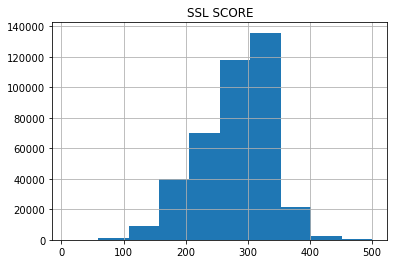

In [7]:
#4What is the distribution of the SSL scores?
df.hist("SSL SCORE")

In [8]:
df["AGE GROUP"].unique()

array(['20-30', 'less than 20', '30-40', nan, '40-50', '50-60', '60-70',
       '70-80'], dtype=object)

In [9]:
#How many records are in the data?
print(len(df.columns))

48


In [10]:
#Which predictors are missing values?
df.isnull().any()

SSL SCORE                                   False
PREDICTOR RAT AGE AT LATEST ARREST           True
PREDICTOR RAT VICTIM SHOOTING INCIDENTS     False
PREDICTOR RAT VICTIM BATTERY OR ASSAULT     False
PREDICTOR RAT ARRESTS VIOLENT OFFENSES      False
PREDICTOR RAT GANG AFFILIATION              False
PREDICTOR RAT NARCOTIC ARRESTS              False
PREDICTOR RAT TREND IN CRIMINAL ACTIVITY    False
PREDICTOR RAT UUW ARRESTS                   False
SEX CODE CD                                 False
RACE CODE CD                                False
WEAPON I                                    False
DRUG I                                      False
AGE GROUP                                    True
AGE TO                                       True
STOP ORDER NO                                True
PAROLEE I                                    True
LATEST DATE                                 False
LATEST DIST                                 False
MAJORITY DIST                                True


"PREDICTOR RAT AGE AT LATEST ARREST" is the only predictor with missing values.


In [11]:
#What is the average SSL score? The max SSL score? The min SSL score?
print("The mean SSL Score is "+ str(df["SSL SCORE"].mean()))
print("The max SSL Score is "+ str(df["SSL SCORE"].max()))
print("The minimum SSL Score is "+str(df["SSL SCORE"].min()))

The mean SSL Score is 279.839742754
The max SSL Score is 500
The minimum SSL Score is 10


In [12]:
#How do we simply view the "SSL Score" column?
df["SSL SCORE"].head(20)

0     500
1     500
2     500
3     500
4     500
5     500
6     498
7     497
8     495
9     495
10    489
11    488
12    487
13    485
14    483
15    481
16    480
17    476
18    475
19    473
Name: SSL SCORE, dtype: int64

In [13]:
#What about the first fifty columns?
df["SSL SCORE"].head(50)

0     500
1     500
2     500
3     500
4     500
5     500
6     498
7     497
8     495
9     495
10    489
11    488
12    487
13    485
14    483
15    481
16    480
17    476
18    475
19    473
20    472
21    472
22    471
23    471
24    470
25    467
26    467
27    467
28    466
29    463
30    462
31    462
32    460
33    458
34    455
35    455
36    454
37    454
38    453
39    453
40    452
41    450
42    449
43    448
44    447
45    447
46    446
47    446
48    445
49    445
Name: SSL SCORE, dtype: int64

In [14]:
#What about the fifty LOWEST scores?
df["SSL SCORE"].sort_values(ascending = False).tail(50)

170891    42
170892    42
170893    41
268150    41
170896    39
170895    39
170894    39
267157    39
170897    39
170898    39
341144    39
397913    38
170899    38
332047    37
297534    37
209909    37
170900    36
318497    36
273548    34
253332    34
170901    34
170902    34
170903    34
170904    34
170905    34
296214    34
170906    33
170907    32
198249    32
170910    30
267677    30
170909    30
170908    30
170911    29
388168    28
189114    28
170912    28
170913    25
277876    25
170914    24
264420    24
204510    23
370119    21
284064    20
170915    19
170916    15
170918    14
170917    14
170920    10
170919    10
Name: SSL SCORE, dtype: int64

In [15]:
#What are the different race categories?

df["RACE CODE CD"].value_counts()

BLK    207842
WWH     99710
WHI     82366
API      4617
WBH      1974
U        1899
I         276
Name: RACE CODE CD, dtype: int64

In [16]:
#How can we know the counts of each race?
len(df["RACE CODE CD"].unique())

7

In [17]:
#How many women had an SSL SCORE of 400 or more?
len(df[(df["SEX CODE CD"] == "F") & (df["SSL SCORE"] >= 400)])

223

In [18]:
#How many Asian/Pacific Islander males under 20 were victims of shooting incidents?
len(df[(df["SEX CODE CD"] == "M") & (df["RACE CODE CD"] == "API") & (df["AGE TO"] == "less than 20")])

464

In [19]:
#How do we find out how many people on SSL are from the suburbs listed below?
len(df[df["IDOC RES CITY"] == "SKOKIE"])
#"SKOKIE","WILMETTE","EVANSTON","DES PLAINES","PALATINE","ARLINGTON HTS","SCHAUMBERG"

84

In [20]:
len(df[df["IDOC RES CITY"] == "WILMETTE"])

6

In [21]:
len(df[df["IDOC RES CITY"] == "EVANSTON"])

221

In [22]:
len(df[df["IDOC RES CITY"] == "DES PLAINES"])

133

In [23]:
len(df[df["IDOC RES CITY"] == "PALATINE"])

57

In [24]:
len(df[df["IDOC RES CITY"] == "ARLINGTON HTS"])

50

In [25]:
len(df[df["IDOC RES CITY"] == "SCHAUMBERG"])

0

In [26]:
#How do we create a column that flags senior citizens with scores less than 450?


In [27]:
len(df[(df["AGE GROUP"] == "60-70") | (df["AGE GROUP"] == "70-80") & (df["SSL SCORE"] < 450)])

8697

In [28]:
df['Flag'] = np.where((df['AGE GROUP'] == "60-70") | (df["AGE GROUP"] == "70-80") & (df["SSL SCORE"] < 450) , 'yes', 'no')

In [35]:
df.head()


,SSL SCORE,PREDICTOR RAT AGE AT LATEST ARREST,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,SEX CODE CD,RACE CODE CD,WEAPON I,DRUG I,AGE GROUP,AGE TO,STOP ORDER NO,PAROLEE I,LATEST DATE,LATEST DIST,MAJORITY DIST,DLST,LATEST DIST RES,WEAPONS ARR CNT,LATEST WEAPON ARR DATE,NARCOTICS ARR CNT,LATEST NARCOTIC ARR DATE,IDOC RES CITY,IDOC RES STATE CODE,IDOC RES ZIP CODE,IDOC CPD DIST,CPD ARREST I,DOMESTIC ARR CNT,LATEST DOMESTIC ARR DATE,AGE CURR,SSL LAST PTV DATE,TRAP STATUS,RAW SSL SCORE,HEAT SCORE,RAW_HEAT_SCORE,STATUS I,PRE RAW HEAT SCORE,TRAP FLAGS,SSL FLAGS,LATITUDE,LONGITUDE,CENSUS TRACT,COMMUNITY AREA,LOCATION,Flag
0,500,20-30,0,1,4,1,1,1.000,1,M,BLK,Y,N,20-30,20-30,nan,NaN,2015,31,24.000,NaN,31,1.000,2012.000,nan,nan,SKOKIE,IL,60077.000,nan,N,nan,nan,20-30,nan,nan,0.142,500,0.142,Y,14196,nan,24.000,nan,nan,nan,,NaN,no
1,500,20-30,0,9,1,1,0,1.000,0,M,WHI,N,N,20-30,20-30,nan,NaN,2016,31,8.000,NaN,8,nan,nan,nan,nan,NaN,NaN,nan,nan,N,1.000,2008.000,20-30,nan,nan,0.145,500,0.145,Y,14511,nan,8.000,nan,nan,nan,,NaN,no
2,500,less than 20,1,2,1,1,3,1.000,0,M,WHI,N,N,less than 20,less than 20,nan,NaN,2016,31,8.000,NaN,8,nan,nan,nan,nan,NaN,NaN,nan,nan,N,nan,nan,less than 20,2015.000,nan,0.130,500,0.130,Y,12982,nan,8.000,nan,nan,nan,,NaN,no
3,500,less than 20,1,1,4,1,0,1.600,1,M,BLK,Y,N,less than 20,less than 20,nan,NaN,2016,31,3.000,NaN,4,2.000,2016.000,nan,nan,NaN,NaN,nan,nan,Y,nan,nan,less than 20,2016.000,nan,0.131,500,0.131,Y,13110,nan,nan,nan,nan,nan,,NaN,no
4,500,less than 20,0,0,5,0,0,1.300,3,M,BLK,Y,N,less than 20,less than 20,nan,NaN,2016,31,20.000,NaN,31,1.000,2016.000,nan,nan,NaN,NaN,nan,nan,N,nan,nan,less than 20,nan,nan,0.129,500,0.129,Y,12874,nan,nan,nan,nan,nan,,NaN,no
